<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Microbial-and-Viral-differentials" data-toc-modified-id="Microbial-and-Viral-differentials-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Microbial and Viral differentials</a></span></li><li><span><a href="#Viral-differentials" data-toc-modified-id="Viral-differentials-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Viral differentials</a></span></li></ul></div>

In [1]:
import os
import arviz as az
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import dask.dataframe as dd
import networkx as nx
import seaborn as sns
import matplotlib as mpl

from matplotlib_venn import venn2, venn3
np.random.seed(0)
%matplotlib inline

In [2]:
all_edges = pd.read_table('../results/interaction_metadata.txt', index_col=0)

In [3]:
all_edges

,microbe,virus,cond_logit,dataset,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,...,checkV_termini,Novel,gid,domain,phylum,class,order,family,genus,species
0,1262981,uvig_108002,4.954891,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",...,No,Yes,G000435955,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Eubacterium_D,Eubacterium_D innocuum
22,1262981,uvig_108002,4.954891,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",...,No,Yes,G000435955,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Eubacterium_D,Eubacterium_D innocuum
44,1262981,ivig_2376,4.954647,Wang,ivig_2376,Isolate,18797,40415,NaN,GCF_000011045,...,No,Yes,G000435955,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Eubacterium_D,Eubacterium_D innocuum
66,1262981,ivig_2376,4.954647,Wang,ivig_2376,Isolate,18797,40415,NaN,GCF_000011045,...,No,Yes,G000435955,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Eubacterium_D,Eubacterium_D innocuum
88,1262981,ivig_2256,4.915556,Wang,ivig_2256,Isolate,41768,39592,NaN,GCA_003602765,...,No,Yes,G000435955,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Eubacterium_D,Eubacterium_D innocuum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1871003,uvig_492171,1.052579,Averina,uvig_492171,Metagenome,3999,59704,NaN,GCA_003482185,...,No,Yes,G900104605,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Tidjanibacter,Tidjanibacter massiliensis
6041,1871003,uvig_568287,1.173307,Averina,uvig_568287,Metagenome,908,119423,NaN,"12718_7#33,GCA_003466785",...,No,No,G900104605,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Tidjanibacter,Tidjanibacter massiliensis
6066,1871003,uvig_568287,1.173307,Averina,uvig_568287,Metagenome,908,119423,NaN,"12718_7#33,GCA_003466785",...,No,No,G900104605,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Tidjanibacter,Tidjanibacter massiliensis
6189,1871003,ivig_4295,1.122697,Averina,ivig_4295,Isolate,18307,23261,NaN,21673_4#3,...,No,No,G900104605,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Tidjanibacter,Tidjanibacter massiliensis


In [4]:
graph = nx.from_pandas_edgelist(all_edges, 'microbe', 'virus')

In [5]:
nx.number_connected_components(graph)

1

In [6]:
components = nx.connected_components(graph)
#c1 = next(components)
#c2 = next(components)
for c in components:
    print('Nodes', len(c))

Nodes 294


In [7]:
pos = nx.spring_layout(graph, k=3, iterations=500)
pos_df = pd.DataFrame(pos).T

In [8]:
microbe_nodes = pd.merge(all_edges, pos_df, left_on='microbe', right_index=True)
virus_nodes = pd.merge(all_edges, pos_df, left_on='virus', right_index=True)

microbe_nodes = microbe_nodes.set_index('microbe').drop_duplicates()
virus_nodes = virus_nodes.set_index('virus').drop_duplicates()

microbe_nodes = microbe_nodes[~microbe_nodes.index.duplicated(keep='first')]
virus_nodes = virus_nodes[~virus_nodes.index.duplicated(keep='first')]

species_pos = microbe_nodes.groupby('species').mean()
genus_pos = microbe_nodes.groupby('genus').mean()

# Microbial and Viral differentials

In [9]:
!ls ../sfari/data/sra_shotgun/Combined/age_sex_matched_posterior

differential_posterior.nc  ogus_differentials-v5.nc   viral_differentials-v4.nc
ogus_differentials-v2.nc   viral_differentials.nc     viral_differentials-v5.nc
ogus_differentials-v3.nc   viral_differentials-v2.nc
ogus_differentials-v4.nc   viral_differentials-v3.nc


In [10]:
# load 16S, whole genome shotgun and RNAseq data
from util import extract_differentials, ranking
wgs_directory = '../sfari/data/sra_shotgun/Combined'
posterior_name = 'age_sex_matched_posterior'
wgs_fname = f'{wgs_directory}/{posterior_name}/ogus_differentials-v5.nc'
vir_fname = f'{wgs_directory}/{posterior_name}/viral_differentials-v5.nc'

wgs_diffs = extract_differentials(wgs_fname)
vir_diffs = extract_differentials(vir_fname)

# Compute statistical tests for each data layer
# Here, we will only focus on the top 10% of the features
wgs_stats = ranking(wgs_diffs, reference_percentile=90)
vir_stats = ranking(vir_diffs, reference_percentile=90)

In [11]:
microbe_nodes.index = list(map(str, microbe_nodes.index))
microbe_nodes = pd.merge(microbe_nodes, wgs_stats, left_index=True, right_index=True)
microbe_nodes['diff'] = microbe_nodes['mean']

virus_nodes.index = list(map(str, virus_nodes.index))
virus_nodes = pd.merge(virus_nodes, vir_stats, left_index=True, right_index=True)
virus_nodes['diff'] = virus_nodes['mean']

In [12]:
microbe_nodes

,virus,cond_logit,dataset,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
1262981,uvig_108002,4.954891,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.398221,0.178060,0.106146,0.405491,0.694253,12.560013,31.540289,-35.836630,8.636026e-127,0.398221
1834207,uvig_108002,4.661455,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.232535,0.114779,0.054565,0.235186,0.439486,17.650846,75.906153,-84.465146,1.116271e-256,0.232535
999413,uvig_108002,4.577396,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.318543,0.093999,0.176049,0.319500,0.482423,36.051004,113.174670,-84.837138,2.120083e-257,0.318543
658657,uvig_108002,4.135746,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.235293,0.103239,0.064751,0.236232,0.401937,22.075968,93.823254,-93.371907,3.247149e-273,0.235293
908340,uvig_108002,4.116589,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.304796,0.077264,0.188134,0.303377,0.444979,51.056782,167.511509,-106.771381,1.474519e-295,0.304796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457402,uvig_432556,1.067751,Dan,uvig_432556,Metagenome,23575,37455,NaN,8080_1#73,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.380439,0.094929,0.222027,0.380147,0.534342,42.217275,110.969773,-70.966067,2.170311e-228,0.380439
1123263,uvig_572613,1.078692,Dan,uvig_572613,Metagenome,920,44836,NaN,GCA_003433995,Firmicutes/Clostridia/Oscillospirales/Ruminoco...,...,0.331163,0.107727,0.152289,0.332521,0.515466,28.536015,86.169055,-71.683496,5.247683e-230,0.331163
545696,ivig_301,1.077556,Dan,ivig_301,Isolate,40972,25586,NaN,GCA_003438075,Firmicutes/Clostridia/Oscillospirales/DTU089/R...,...,0.446960,0.082502,0.304089,0.449012,0.582301,65.665841,146.916510,-65.529305,1.143995e-215,0.446960
1033731,uvig_592194,1.140393,Averina,uvig_592194,Metagenome,929,17982,Siphoviridae,"GCA_003473445,GCA_003474205,GCA_003464175,1420...",Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.404902,0.237103,-0.006953,0.418452,0.760930,7.202364,17.787902,-26.349097,2.326704e-89,0.404902


/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

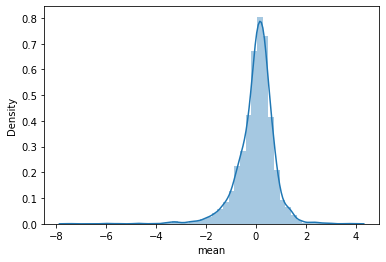

In [13]:
sns.distplot(wgs_stats['mean'])

In [14]:
wgs_stats['mean'].describe()

count    4.410000e+03
mean    -1.933450e-17
std      7.443751e-01
min     -7.462264e+00
25%     -3.099811e-01
50%      8.982761e-02
75%      4.030213e-01
max      3.900319e+00
Name: mean, dtype: float64

In [15]:
microbe_nodes.sort_values('mean')

,virus,cond_logit,dataset,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
1263111,uvig_129399,1.433876,Wang,uvig_129399,Metagenome,30887,70387,NaN,GCA_003467125,Firmicutes/Negativicutes/Veillonellales/Megasp...,...,-2.250409,0.862332,-3.444239,-2.323844,-0.725460,-3.026306,1.344780,-68.829305,1.718177e-223,-2.250409
742823,ivig_484,1.019180,Averina,ivig_484,Isolate,3430,44305,NaN,GCA_003458155,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,...,-0.862904,0.291223,-1.348706,-0.855073,-0.403841,-10.174425,11.790906,-108.520072,2.799631e-298,-0.862904
1203554,uvig_296724,1.436647,Averina,uvig_296724,Metagenome,47655,28887,NaN,13470_2#77,Firmicutes/Clostridia/Clostridiales/Clostridia...,...,-0.743943,0.284970,-1.210225,-0.721475,-0.311158,-9.160941,12.314042,-102.552279,8.126147e-289,-0.743943
1263103,uvig_9921,1.747437,Dan,uvig_9921,Metagenome,10058,57079,NaN,"18048_1#66,GCF_000613685,GCA_003465265,GCA_003...",Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,...,-0.739312,0.488875,-1.544956,-0.740263,0.095975,-3.093368,4.184117,-59.589325,9.991258e-201,-0.739312
1263095,ivig_2243,1.024447,Dan,ivig_2243,Isolate,41743,22159,NaN,GCA_003482095,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,-0.602537,0.210663,-0.976540,-0.599370,-0.258412,-13.577136,22.533293,-125.300963,1.778636e-322,-0.602537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702459,uvig_108002,1.723936,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.627937,0.312655,0.095533,0.643339,1.151051,6.423697,10.229848,-5.714836,2.151927e-08,0.627937
518635,ivig_2376,1.011153,Wang,ivig_2376,Isolate,18797,40415,NaN,GCF_000011045,Firmicutes/Bacilli/Lactobacillales/Lactobacill...,...,0.799903,0.254061,0.358303,0.797839,1.231279,12.392578,15.492592,6.504592,2.335738e-10,0.799903
1506471,ivig_115,1.151687,Dan,ivig_115,Isolate,40689,10600,NaN,GCA_003435265,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.924356,0.244508,0.548016,0.919058,1.305422,15.461511,16.726797,16.938521,7.035638e-49,0.924356
479437,uvig_108002,2.397382,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.979629,0.215963,0.636427,0.988927,1.332416,21.004102,21.440876,24.296195,1.092163e-80,0.979629


# Viral differentials

In [16]:
coords = {
    'Klebsiella': {'dx': -0.45, 'dy': 0.01},
    'Escherichia': {'dx': -0.58, 'dy': 0.01},
    'Bacteroides': {'dx': 0.08, 'dy': 0.0},
    'Veillonella': {'dx': 0, 'dy': -0.1},
    'Collinsella': {'dx': -0.55, 'dy': 0.01},
    'Tidjanibacter': {'dx': -0.3, 'dy': 0.05},
}

In [17]:
coords = {
    'Klebsiella': {'dx': -0, 'dy': 0},
    'Escherichia': {'dx': 0.0, 'dy': 0.0},
    'Bacteroides': {'dx': 0.0, 'dy': 0},
    'Prevotella': {'dx': -0., 'dy': -0},
    'Alistipes': {'dx': -0, 'dy': -0}, 
    'Bifidobacterium': {'dx': -0, 'dy': 0.0}
}

In [18]:
microbe_nodes

,virus,cond_logit,dataset,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
1262981,uvig_108002,4.954891,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.398221,0.178060,0.106146,0.405491,0.694253,12.560013,31.540289,-35.836630,8.636026e-127,0.398221
1834207,uvig_108002,4.661455,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.232535,0.114779,0.054565,0.235186,0.439486,17.650846,75.906153,-84.465146,1.116271e-256,0.232535
999413,uvig_108002,4.577396,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.318543,0.093999,0.176049,0.319500,0.482423,36.051004,113.174670,-84.837138,2.120083e-257,0.318543
658657,uvig_108002,4.135746,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.235293,0.103239,0.064751,0.236232,0.401937,22.075968,93.823254,-93.371907,3.247149e-273,0.235293
908340,uvig_108002,4.116589,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,0.304796,0.077264,0.188134,0.303377,0.444979,51.056782,167.511509,-106.771381,1.474519e-295,0.304796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457402,uvig_432556,1.067751,Dan,uvig_432556,Metagenome,23575,37455,NaN,8080_1#73,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.380439,0.094929,0.222027,0.380147,0.534342,42.217275,110.969773,-70.966067,2.170311e-228,0.380439
1123263,uvig_572613,1.078692,Dan,uvig_572613,Metagenome,920,44836,NaN,GCA_003433995,Firmicutes/Clostridia/Oscillospirales/Ruminoco...,...,0.331163,0.107727,0.152289,0.332521,0.515466,28.536015,86.169055,-71.683496,5.247683e-230,0.331163
545696,ivig_301,1.077556,Dan,ivig_301,Isolate,40972,25586,NaN,GCA_003438075,Firmicutes/Clostridia/Oscillospirales/DTU089/R...,...,0.446960,0.082502,0.304089,0.449012,0.582301,65.665841,146.916510,-65.529305,1.143995e-215,0.446960
1033731,uvig_592194,1.140393,Averina,uvig_592194,Metagenome,929,17982,Siphoviridae,"GCA_003473445,GCA_003474205,GCA_003464175,1420...",Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.404902,0.237103,-0.006953,0.418452,0.760930,7.202364,17.787902,-26.349097,2.326704e-89,0.404902


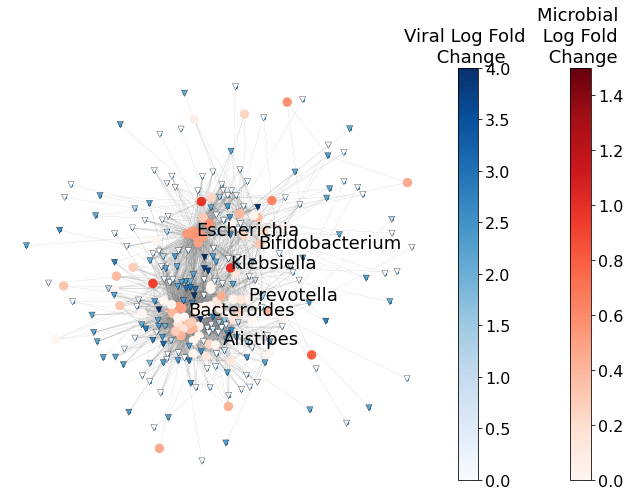

In [43]:
import matplotlib as mpl

#from matplotlib.colors import TwoSlopeNorm

fig, ax = plt.subplots(figsize=(9.5, 7))
nx.draw(graph, pos=pos, node_size=5, width=0.1, edge_color='gray')

norm1 =mpl.colors.Normalize(vmin=0, vmax=1.5)
norm2 = mpl.colors.Normalize(vmin=0, vmax=4.0)
#norm = mpl.colors.Normalize(vmin=0, vmax=1.5)

cbar1 = ax.scatter(microbe_nodes[0], microbe_nodes[1], s=70, zorder=2, 
                   c=microbe_nodes['diff'], cmap='Reds', norm=norm1)
cbar2 = ax.scatter(virus_nodes[0], virus_nodes[1], s=40, zorder=2, 
                   c=virus_nodes['diff'], cmap='Blues', ec='k', lw=0.3, norm=norm2,
                   marker='v')
clb1 = plt.colorbar(cbar1)
clb2 = plt.colorbar(cbar2)
clb1.ax.tick_params(labelsize=16) 
clb2.ax.tick_params(labelsize=16) 
clb1.ax.set_title('Microbial \n Log Fold \n Change', fontsize=18)
clb2.ax.set_title('Viral Log Fold \n Change', fontsize=18)

for s in genus_pos.index:
    row = genus_pos.loc[s]
    if row.name in {'Citrobacter', 'Megamonas', 'Mitsuokella'}:
        continue
    
    genus_name = row.name.replace(' ', '\n')
    if genus_name in coords:
        dx, dy = coords[genus_name]['dx'], coords[genus_name]['dy']

        ax.annotate(genus_name, (row[0] + dx, row[1] + dy), 
                    fontsize=18, 
                    color='k')
#ax.set_facecolor('black')
#fig.set_facecolor('black')
plt.tight_layout()

In [20]:
species_pos = microbe_nodes.groupby('species').mean()

In [21]:
species_pos.to_csv('../results/mmvec/species_positions.csv')

In [22]:
species_pos

,cond_logit,GPD_VC,Size,checkV_completion,0,1,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
species,,,,,,,,,,,,,,,,
Alistipes obesi,1.554766,18608.0,36252.0,100.000000,0.044260,-0.135015,0.046903,0.147075,-0.201471,0.045444,0.290221,2.168314,46.229836,-91.160628,3.014000e-269,0.046903
Alistipes putredinis,1.637690,40930.0,37629.0,88.330000,-0.003901,-0.317153,0.240971,0.187686,-0.055395,0.247363,0.543987,6.840674,28.388002,-50.755406,3.651624e-176,0.240971
Alistipes shahii,1.651807,40930.0,37629.0,88.330000,0.103832,-0.193179,0.160487,0.150092,-0.071694,0.152572,0.405842,7.124031,44.390209,-74.193194,1.486357e-235,0.160487
Alistipes timonensis,1.140393,929.0,17982.0,52.010000,0.080033,-0.637164,0.404902,0.237103,-0.006953,0.418452,0.760930,7.202364,17.787902,-26.349097,2.326704e-89,0.404902
Alistipes_A ihumii,1.510251,38614.0,16789.0,46.990000,0.128964,-0.153555,0.256294,0.268389,-0.187854,0.251036,0.732481,3.558032,13.882635,-34.351806,3.008624e-121,0.256294
Bacteroides caccae,2.224185,18608.0,36252.0,100.000000,0.002948,-0.027661,-0.279686,0.205032,-0.618469,-0.280663,0.039351,-6.934855,27.754082,-100.857053,9.163918e-258,-0.279686
Bacteroides cellulosilyticus,2.024412,40930.0,37629.0,88.330000,-0.118420,-0.239325,0.166728,0.159156,-0.103386,0.172372,0.432873,6.582094,39.478104,-69.183578,2.594489e-224,0.166728
Bacteroides faecis,1.455082,40930.0,37629.0,88.330000,-0.127527,-0.274719,0.411759,0.202507,0.077372,0.428776,0.717867,10.040659,24.384792,-30.173373,5.195678e-105,0.411759
Bacteroides finegoldii,2.011783,40930.0,37629.0,88.330000,-0.048756,-0.275421,0.016301,0.170903,-0.282247,0.021798,0.292782,0.558108,34.237259,-82.031657,6.891616e-252,0.016301


In [23]:
genus_pos

,cond_logit,GPD_VC,Size,checkV_completion,0,1
genus,,,,,,
Alistipes,1.496164,25349.250000,32373.000000,82.167500,0.056056,-0.320628
Alistipes_A,1.510251,38614.000000,16789.000000,46.990000,0.128964,-0.153555
Bacteroides,1.470237,29393.714286,27955.333333,72.171905,-0.097033,-0.169205
Bacteroides_A,1.355932,40930.000000,37629.000000,88.330000,0.011973,-0.222045
Bacteroides_B,1.958042,14813.500000,38265.250000,94.255000,-0.036187,-0.177319
Barnesiella,1.411986,18608.000000,36252.000000,100.000000,0.101273,-0.088689
Bifidobacterium,2.638170,33060.500000,34554.500000,99.482500,0.210675,0.172949
Bilophila,1.530390,40930.000000,37629.000000,88.330000,-0.073433,-0.367351
Butyricimonas,1.008942,40930.000000,37629.000000,88.330000,0.070259,-0.169799


In [24]:
!ls ../results

16S_compounds.csv		   kegg_embeddings.csv
16S_KEGG.csv			   metabolomics
amp_compound_edges.npz.npy	   mmvec
amp_compound_edges.parquet	   phylogenetic
amp-crossectional.csv		   rna_compound_edges.npz.npy
amp-crossectional-studies.csv	   rna_compound_edges.parquet
amplicon_differentials.csv	   RNA_compounds.csv
amp-logodds.csv			   RNA_KEGG.csv
amp_subset.csv			   seqs.fa
asd_core_microbiome_fmt.csv	   supplemental_tables
asd_diabetes_differential.csv	   t1d__kegg_set.csv
asd_ibd_differential.csv	   t1d__taxa_set.csv
asd_ibd_kegg_set.csv		   top_asd_dia_specific_taxa.csv
asd_ibd_taxa_set.csv		   top_asd_specific_taxa.csv
asd__kegg_set.csv		   top_asd_taxa.csv
asd_specific_microbiome_fmt.csv    top_diabetes_taxa.csv
asd_t1d_kegg_set.csv		   top_dia_specific_taxa.csv
asd_t1d_taxa_set.csv		   top_ibd_asd_specific_taxa.csv
asd__taxa_set.csv		   top_ibd_dia_specific_taxa.csv
benchmarking			   top_ibd_specific_taxa.csv
berding_diet_microbes.csv	   top_ibd_taxa.csv
berding_diet_stats.csv		   

In [25]:
microbe_nodes.to_csv('microbe-viral-interactions.csv')
microbe_nodes.to_csv('../results/supplemental_tables/Table_S8.csv')

In [26]:
vir_stats 

,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue
features,,,,,,,,,
ivig_10,1.053632,3.035314,-3.570961,1.019365,6.031626,0.114362,0.108541,-10.103344,1.605418e-21
ivig_1001,1.635049,3.145068,-3.461144,1.530428,6.872784,0.165299,0.101097,-6.053445,3.272889e-09
ivig_1002,-2.866093,3.613318,-8.987377,-2.679767,2.593584,-0.219522,0.076593,-30.183151,4.748516e-105
ivig_1113,-2.592913,3.468718,-8.775608,-2.078443,2.564733,-0.215501,0.083112,-29.866289,8.822829e-104
ivig_1131,2.275230,1.964405,-0.933539,2.343762,5.453817,0.589608,0.259142,-3.173918,1.620548e-03
...,...,...,...,...,...,...,...,...,...
uvig_98139,-5.252767,2.961537,-9.862510,-5.266059,-0.483988,-0.598899,0.114016,-52.943727,1.553921e-182
uvig_98916,2.269345,0.367489,1.681462,2.260120,2.869062,16.803937,7.404752,-17.286404,2.245056e-50
uvig_9921,2.610084,3.200887,-2.251464,2.284639,8.439052,0.254750,0.097602,0.144403,8.852552e-01


In [27]:
virus_nodes

,microbe,cond_logit,dataset,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
uvig_108002,1262981,4.954891,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,-2.804701,3.599471,-9.087558,-2.582529,2.694630,-0.216476,0.077183,-29.958148,3.777210e-104,-2.804701
ivig_2376,1262981,4.954647,Wang,ivig_2376,Isolate,18797,40415,NaN,GCF_000011045,Firmicutes/Bacilli/Lactobacillales/Lactobacill...,...,-2.966994,3.517573,-9.171416,-2.571970,2.479550,-0.239790,0.080819,-31.578408,1.416214e-110,-2.966994
ivig_2256,1262981,4.915556,Wang,ivig_2256,Isolate,41768,39592,NaN,GCA_003602765,Firmicutes/Negativicutes/Veillonellales/Veillo...,...,-3.458904,3.514044,-9.273539,-3.169431,2.005945,-0.280107,0.080981,-34.409800,1.818243e-121,-3.458904
ivig_2624,1262981,1.741121,Wang,ivig_2624,Isolate,18608,36252,Myoviridae,GCF_000164315,Proteobacteria/Gammaproteobacteria/Enterobacte...,...,2.224868,2.264111,-1.754812,2.276723,5.870521,0.434019,0.195076,-3.198657,1.490922e-03,2.224868
ivig_115,1262981,1.740448,Wang,ivig_115,Isolate,40689,10600,NaN,GCA_003435265,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,3.829112,2.845205,-1.048953,3.854367,8.299326,0.473011,0.123530,8.731456,6.971285e-17,3.829112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uvig_146153,1263103,1.267219,Dan,uvig_146153,Metagenome,1719,78084,NaN,GCA_003467005,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,...,2.287890,2.091743,-1.206144,2.360177,5.494683,0.522900,0.228551,-2.859660,4.463652e-03,2.287890
uvig_235222,1263103,1.176428,Dan,uvig_235222,Metagenome,14517,76979,NaN,GCA_003635445,Bacteroidota/Bacteroidia/Bacteroidales/Tannere...,...,2.216764,2.244953,-1.618674,2.274219,5.778589,0.439850,0.198420,-3.298145,1.060572e-03,2.216764
ivig_2200,1263103,1.041730,Dan,ivig_2200,Isolate,5262,38928,NaN,GCA_003481535,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,-2.543302,3.490708,-8.693643,-2.216901,2.770042,-0.208723,0.082068,-29.393894,7.033678e-102,-2.543302
uvig_246943,1263103,1.021296,Dan,uvig_246943,Metagenome,49672,34650,NaN,"GCA_003461565,GCA_003477655,GCA_003481005",Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.325372,2.091689,-3.129197,0.468437,3.797718,0.074368,0.228563,-21.624639,3.396190e-69,0.325372


In [28]:
pd.merge(virus_nodes, vir_stats, left_index=True, right_index=True)

,microbe,cond_logit,dataset,GPD_id,Source,GPD_VC,Size,Predicted_phage_taxon,Host_range_isolates,Host_range_taxon,...,diff,mean_y,std_y,5%_y,50%_y,95%_y,effect_size_y,effect_std_y,tstat_y,pvalue_y
uvig_108002,1262981,4.954891,Wang,uvig_108002,Metagenome,37815,32601,Myoviridae,"GCA_003464755,GCF_000164195,12718_7#19,20298_3...",Proteobacteria/Gammaproteobacteria/Enterobacte...,...,-2.804701,-2.804701,3.599471,-9.087558,-2.582529,2.694630,-0.216476,0.077183,-29.958148,3.777210e-104
ivig_2376,1262981,4.954647,Wang,ivig_2376,Isolate,18797,40415,NaN,GCF_000011045,Firmicutes/Bacilli/Lactobacillales/Lactobacill...,...,-2.966994,-2.966994,3.517573,-9.171416,-2.571970,2.479550,-0.239790,0.080819,-31.578408,1.416214e-110
ivig_2256,1262981,4.915556,Wang,ivig_2256,Isolate,41768,39592,NaN,GCA_003602765,Firmicutes/Negativicutes/Veillonellales/Veillo...,...,-3.458904,-3.458904,3.514044,-9.273539,-3.169431,2.005945,-0.280107,0.080981,-34.409800,1.818243e-121
ivig_2624,1262981,1.741121,Wang,ivig_2624,Isolate,18608,36252,Myoviridae,GCF_000164315,Proteobacteria/Gammaproteobacteria/Enterobacte...,...,2.224868,2.224868,2.264111,-1.754812,2.276723,5.870521,0.434019,0.195076,-3.198657,1.490922e-03
ivig_115,1262981,1.740448,Wang,ivig_115,Isolate,40689,10600,NaN,GCA_003435265,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,3.829112,3.829112,2.845205,-1.048953,3.854367,8.299326,0.473011,0.123530,8.731456,6.971285e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uvig_146153,1263103,1.267219,Dan,uvig_146153,Metagenome,1719,78084,NaN,GCA_003467005,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,...,2.287890,2.287890,2.091743,-1.206144,2.360177,5.494683,0.522900,0.228551,-2.859660,4.463652e-03
uvig_235222,1263103,1.176428,Dan,uvig_235222,Metagenome,14517,76979,NaN,GCA_003635445,Bacteroidota/Bacteroidia/Bacteroidales/Tannere...,...,2.216764,2.216764,2.244953,-1.618674,2.274219,5.778589,0.439850,0.198420,-3.298145,1.060572e-03
ivig_2200,1263103,1.041730,Dan,ivig_2200,Isolate,5262,38928,NaN,GCA_003481535,Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,-2.543302,-2.543302,3.490708,-8.693643,-2.216901,2.770042,-0.208723,0.082068,-29.393894,7.033678e-102
uvig_246943,1263103,1.021296,Dan,uvig_246943,Metagenome,49672,34650,NaN,"GCA_003461565,GCA_003477655,GCA_003481005",Firmicutes/Clostridia/Lachnospirales/Lachnospi...,...,0.325372,0.325372,2.091689,-3.129197,0.468437,3.797718,0.074368,0.228563,-21.624639,3.396190e-69
